In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)
plt.rc('figure', figsize = (12, 5))
from sklearn import preprocessing,svm
import seaborn as sns
import pandas.util.testing as tm
import matplotlib.pyplot as plt
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [2]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apach

Q1 & Q2) READING THE DATASET AND CREATING A DATAFRAME.

In [30]:
from google.colab import drive
drive.mount('/content/drive')
#!ls "/content/drive/My Drive"
data1=pd.read_csv("/content/drive/MyDrive/Salary_Data.csv") 
df=pd.DataFrame(data1)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


  Q1 & Q2)  DATA VISUALISATION

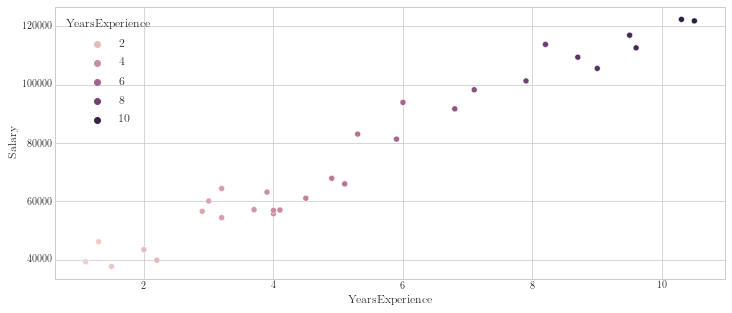

In [4]:
sns.scatterplot(x="YearsExperience", y="Salary", hue="YearsExperience", data=df)

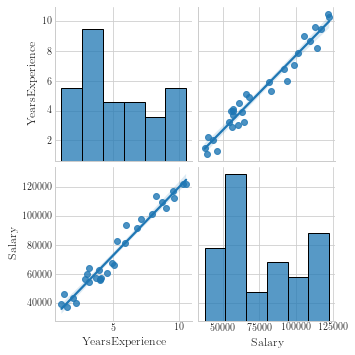

In [5]:
sns.pairplot(df,kind= "reg")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


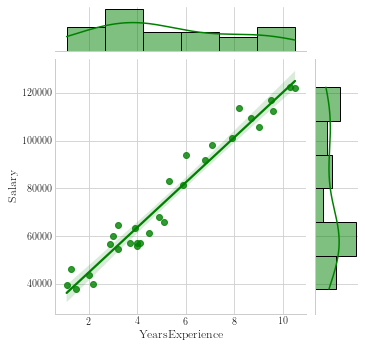

In [6]:
sns.jointplot(x="YearsExperience", y="Salary", color = 'green', kind = "reg", data=df, size = 5)

Q2) CHECKING NULL VALUES AND REPLACING IT WITH MEAN

In [31]:
fill=df['Salary'].mean() 
df1=df.fillna(value={'Salary': fill})
df1.tail(30)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Q3) 

The approaches that can be used for model building: 1.Supervised learning: a)KNN- works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

b)REGRESSION: Linear:Linear Regression is the process of finding a line that best fits the data points available on the plot, so that we can use it to predict output values for inputs that are not present in the data set we have, with the belief that those outputs would fall on the line.

Logistic:Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

c)Support vector machines:A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.

d)Decision trees:Introduction Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter.

e)Random forest:Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.


2)UNSUPERVISED LEARNING: a)K-Means clustering:K-means clustering is a method used for clustering analysis, especially in data mining and statistics. It aims to partition a set of observations into a number of clusters (k), resulting in the partitioning of the data into Voronoi cells.
b)kernel density estimation:In statistics, kernel density estimation (KDE) is the application of kernel smoothing for probability density estimation, i.e., a non-parametric method to estimate the probability density function of a random variable based on kernels as weights.


3)REINFORCEMENT LEARING:ALgorithms that learn via reinforcement from criticism that provides information on the quality of the solution but not on how to improve it.Improved solutionns are achieved by iterativelty exploring the solution space.

Q4) 

An appropriate approach that can be used for model building:

Linear Regression:Linear Regression is the process of finding a line that best fits the data points available on the plot, so that we can use it to predict output values for inputs that are not present in the data set we have, with the belief that those outputs would fall on the line.
Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

You’ll find that linear regression is used in everything from biological, behavioral, environmental, Trend forecasting and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.

The chosen data set Salary_data containing employees' years of experience and their respective salaries. The model designed is used to predict output values for inputs that are not present in the data set we have, with the belief that those outputs would fall on the line.

Q5) 

The lmplot() function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas DataFrame. To plot them, we provide the predictor and response variable names along with the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


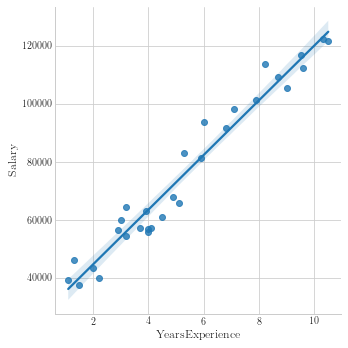

In [8]:
import seaborn as sns
sns.lmplot("YearsExperience","Salary",df1)

In [9]:
grouped = df1.groupby('YearsExperience')
YearsExperience_means = grouped.Salary.mean()
YearsExperience_variances = grouped.Salary.var()
print('Means:', YearsExperience_means)
print('\n')
print('Variances:',YearsExperience_variances)

Means: YearsExperience
1.1      39343.0
1.3      46205.0
1.5      37731.0
2.0      43525.0
2.2      39891.0
2.9      56642.0
3.0      60150.0
3.2      59445.0
3.7      57189.0
3.9      63218.0
4.0      56375.5
4.1      57081.0
4.5      61111.0
4.9      67938.0
5.1      66029.0
5.3      83088.0
5.9      81363.0
6.0      93940.0
6.8      91738.0
7.1      98273.0
7.9     101302.0
8.2     113812.0
8.7     109431.0
9.0     105582.0
9.5     116969.0
9.6     112635.0
10.3    122391.0
10.5    121872.0
Name: Salary, dtype: float64


Variances: YearsExperience
1.1            NaN
1.3            NaN
1.5            NaN
2.0            NaN
2.2            NaN
2.9            NaN
3.0            NaN
3.2     50000000.0
3.7            NaN
3.9            NaN
4.0       676284.5
4.1            NaN
4.5            NaN
4.9            NaN
5.1            NaN
5.3            NaN
5.9            NaN
6.0            NaN
6.8            NaN
7.1            NaN
7.9            NaN
8.2            NaN
8.7            NaN
9.0   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


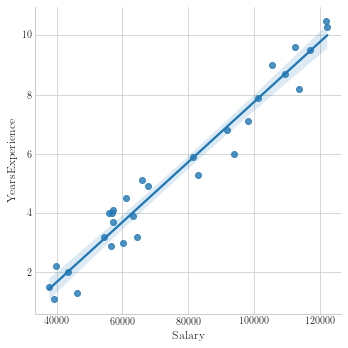

In [10]:
sns.lmplot("Salary","YearsExperience",df1)

In [11]:
#Calculates a pearson's coorelation coefficient(r value) and the p value (significane) for testing corelation 
import scipy.stats 
scipy.stats.pearsonr(df1.YearsExperience.values, df1.Salary.values)

(0.9782416184887599, 1.1430681092271564e-20)

We can also compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

For that we use using Scikit-learn, library that provides a variety of both supervised and unsupervised machine learning techniques. Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. The Estimator.fit method sets the state of the estimator based on the training data. Usually, the data is comprised of a two-dimensional numpy array X of shape (n_samples, n_predictors) that holds the so-called feature matrix and a one-dimensional numpy array y that holds the responses. Some estimators allow the user to control the fitting behavior.

For example, the sklearn.linear_model.LinearRegression estimator allows the user to specify whether or not to fit an intercept term. This is done by setting the corresponding constructor arguments of the estimator object. During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore (''). 

For example, the coefficients of a LinearRegression estimator are stored in the attribute coef.

 Estimators that can generate predictions provide a Estimator.predict method. In the case of regression, Estimator.predict will return the predicted regression values, y .

In [12]:
from sklearn.linear_model import LinearRegression
est = LinearRegression(fit_intercept = True)
x = df1[['YearsExperience']] 
y = df1[['Salary']]
est.fit(x, y)
print("Coefficients:", est.coef_)
print("Intercept:", est.intercept_)

Coefficients: [[9449.96232146]]
Intercept: [25792.20019867]


In [13]:
from sklearn import metrics
yprecdict=est.predict(x)
print("MSE:",metrics.mean_squared_error(yprecdict,y))
print("R^2:",metrics.r2_score(yprecdict,y))  
print("variance:",y.var())

MSE: 31270951.722280964
R^2: 0.955020600755191
variance: Salary    7.515510e+08
dtype: float64


The positive trend in the above graph is validated by the MSE value and  the R^2 value, which is the best possible score.



**MODEL FOR 50% TRAIN AND 50% TEST** 

Splitting the data into training and testing data 

In [15]:
X = np.array(df1['YearsExperience']).reshape(-1, 1)
y = np.array(df1['Salary']).reshape(-1, 1)  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.5,test_size = 0.5,random_state=0) 

In [16]:
regr = LinearRegression()
regr.fit(X_train, y_train)
X_train.shape 


(15, 1)

In [17]:
y_pred=regr.predict(X_test)
y_pred

array([[ 41050.78963422],
       [121866.40308407],
       [ 64928.12997168],
       [ 63091.41148418],
       [114519.52913409],
       [107172.6551841 ],
       [115437.88837784],
       [ 64009.77072793],
       [ 75948.44089666],
       [ 99825.78123411],
       [ 53907.8190467 ],
       [ 74111.72240916],
       [ 56662.89677794],
       [ 68601.56694667],
       [102580.85896536]])

Text(0, 0.5, 'Salary')

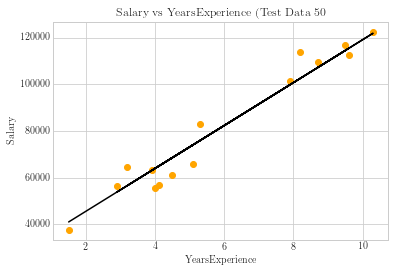

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test,y_test,color='orange') 
plt.plot(X_test,regr.predict(X_test),color='black')
plt.title('Salary vs YearsExperience (Test Data 50%)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

**MODEL FOR 80% TRAIN AND 20% TEST**

Splitting the data into training and testing data 

In [21]:
X = np.array(df1['YearsExperience']).reshape(-1, 1)
y = np.array(df1['Salary']).reshape(-1, 1)
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8,test_size = 0.2,random_state=0)

In [22]:
regr = LinearRegression()
regr.fit(X_train, y_train)
X_train.shape
y_test.shape 

(6, 1)

Predicting the test result and visualizing the test result on the regression line

In [23]:
y_pred=regr.predict(X_test)
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

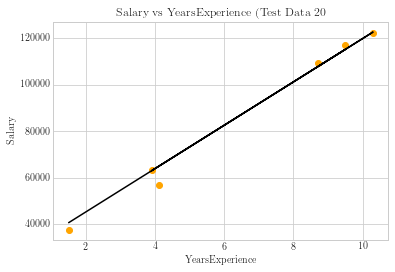

In [24]:
plt.scatter(X_test,y_test,color='orange')
plt.plot(X_test,regr.predict(X_test),color='black') 
plt.title('Salary vs YearsExperience (Test Data 20%)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

**LINEAR REGRESSION FOR SALARY DATA:**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


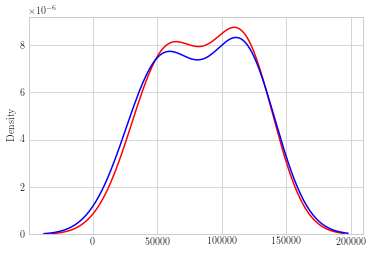

In [25]:
ax1 = sns.distplot(est.predict(X_test), hist=False,  color="r", label="Actual Test Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Test Values" , ax=ax1)

RED-ACTUAL VALUE 

BLUE- FITTED VALUE 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


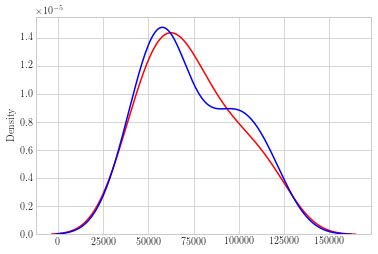

In [26]:
ax1 = sns.distplot(est.predict(X_train), hist=False, color="r", label="Actual Train Value")
sns.distplot(y_train, hist=False, color="b", label="Fitted Train Values" , ax=ax1)

In [27]:
trainscr = est.score(X_train, y_train)
testscr = est.score(X_test, y_test)
print("train score:{}\ntest score:{}".format(trainscr,testscr))
print('\n')

train score:0.9408505111069245
test score:0.9899356101129206




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, est.predict(X_train)))
rmse1 = np.sqrt(mean_squared_error(y_test, est.predict(X_test)))
print("train rmse:{}\ntest rmse:{}".format(rmse,rmse1))
print('\n')

train rmse:6030.042875558639
test rmse:3302.8912012209603




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
